<a href="https://colab.research.google.com/github/davejinyoung/SENG474_flight_pricing_model/blob/main/SENG_474_Flight_Predictor_Neural_Network_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kagglehub[pandas-datasets]
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter

In [3]:
# Download/Update "Airline Market Fare Prediction Data"
dataset_download = kagglehub.dataset_download("orvile/airline-market-fare-prediction-data")
dataset_path = f"{dataset_download}/Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv"

df = pd.read_csv(dataset_path)

100%|██████████| 5.97M/5.97M [00:00<00:00, 96.7MB/s]

Extracting files...


In [4]:
# Set precision for viewing
pd.set_option('display.precision', 3)

# Preview (first 5 tuples)
print("First 5 tuples:")
df.head()

First 5 tuples:


,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367,0,0.0,1992.45,0.004,0.04,0.004,0.022,0.117,1.322e-04
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.052,0,0.0,1992.45,0.004,0.04,0.004,0.008,0.308,1.322e-04
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.035,0,0.0,1992.45,0.004,0.04,0.004,0.009,0.117,1.322e-04
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.030,0,0.0,1992.45,0.004,0.04,0.004,0.022,0.117,1.322e-04
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062,0,0.0,1992.45,0.004,0.04,0.004,0.008,0.308,1.322e-04


In [5]:
# Dataset info
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581278 entries, 0 to 1581277
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MktCoupons               1581278 non-null  int64  
 1   OriginCityMarketID       1581278 non-null  int64  
 2   DestCityMarketID         1581278 non-null  int64  
 3   OriginAirportID          1581278 non-null  int64  
 4   DestAirportID            1581278 non-null  int64  
 5   Carrier                  1581278 non-null  int64  
 6   NonStopMiles             1581278 non-null  float64
 7   RoundTrip                1581278 non-null  float64
 8   ODPairID                 1581278 non-null  int64  
 9   Pax                      1581278 non-null  float64
 10  CarrierPax               1581278 non-null  float64
 11  Average_Fare             1581278 non-null  float64
 12  Market_share             1581278 non-null  float64
 13  Market_HHI               158

In [6]:
# Basic Stats
print("Basic stats:")
df.describe()

Basic stats:


,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
count,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,...,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06,1.581e+06
mean,1.179e+00,1.082e+02,1.088e+02,1.484e+02,1.493e+02,1.278e+01,1.183e+03,8.052e-01,2.488e+03,1.773e+05,...,1.026e+00,1.213e-01,8.221e-01,1.214e+03,2.655e-02,2.653e-02,1.658e-02,1.659e-02,1.528e-01,7.776e-04
std,3.877e-01,6.780e+01,6.825e+01,7.974e+01,8.006e+01,7.785e+00,7.137e+02,3.960e-01,1.402e+03,2.380e+05,...,1.092e-01,3.265e-01,3.825e-01,7.268e+02,1.934e-02,1.925e-02,1.009e-02,1.008e-02,1.119e-01,9.118e-04
min,1.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000e+02,0.000e+00,0.000e+00,1.000e+00,...,1.000e+00,0.000e+00,0.000e+00,1.020e+02,4.427e-06,2.530e-06,4.427e-06,2.530e-06,3.959e-04,6.324e-07
25%,1.000e+00,4.800e+01,4.800e+01,7.300e+01,7.400e+01,4.000e+00,6.430e+02,1.000e+00,1.349e+03,3.182e+04,...,1.000e+00,0.000e+00,1.000e+00,6.580e+02,1.037e-02,1.051e-02,8.544e-03,8.632e-03,5.086e-02,2.093e-04
50%,1.000e+00,1.070e+02,1.080e+02,1.500e+02,1.510e+02,1.500e+01,1.011e+03,1.000e+00,2.598e+03,8.654e+04,...,1.000e+00,0.000e+00,1.000e+00,1.041e+03,2.645e-02,2.621e-02,1.637e-02,1.672e-02,1.168e-01,4.648e-04
75%,1.000e+00,1.580e+02,1.590e+02,2.130e+02,2.140e+02,2.000e+01,1.590e+03,1.000e+00,3.493e+03,2.318e+05,...,1.000e+00,0.000e+00,1.000e+00,1.639e+03,3.979e-02,3.978e-02,2.325e-02,2.335e-02,3.077e-01,1.035e-03
max,3.000e+00,2.660e+02,2.670e+02,2.900e+02,2.910e+02,2.400e+01,5.095e+03,1.000e+00,5.354e+03,1.495e+06,...,2.986e+00,1.000e+00,1.000e+00,5.097e+03,6.692e-02,6.629e-02,3.630e-02,3.597e-02,3.077e-01,5.303e-03


In [7]:
from sklearn.preprocessing import StandardScaler

# Copy dataset
flights_df = df.copy()

# Handle missing values
flights_df.dropna(inplace=True)

# Split data into features/target
X = flights_df.drop("Average_Fare", axis=1)
y = flights_df["Average_Fare"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to df
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Mean fare price:  214.4830666334446
Standard devation of fare price:  73.37320109376054


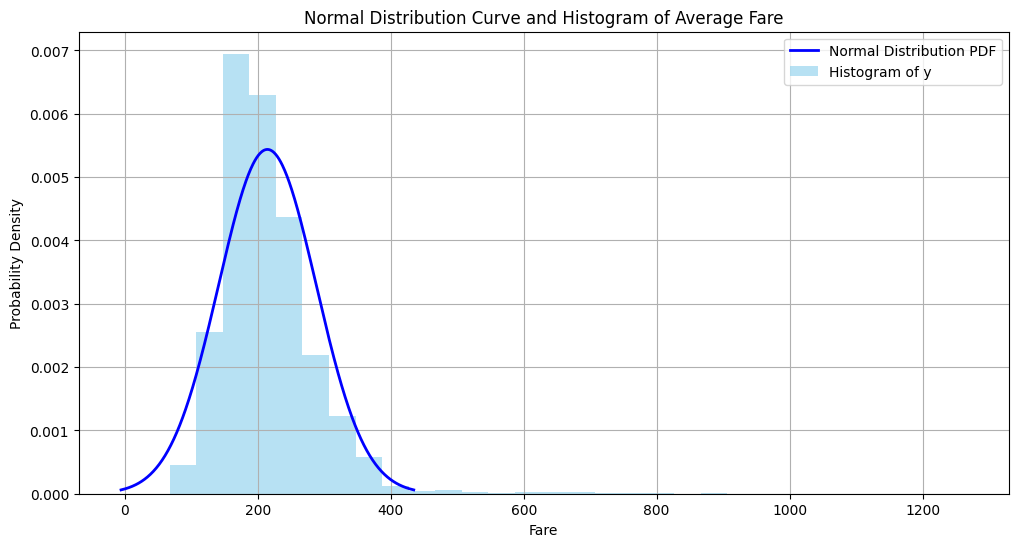

In [15]:
# Data info
data = np.array(y)
mean = np.mean(data)
print("Mean fare price: ", mean)
print("Standard devation of fare price: ", np.std(data))

from scipy.stats import norm
data = np.array(y)
mean_value = np.mean(data)
std_dev = np.std(data)

x = np.linspace(mean_value - 3*std_dev, mean_value + 3*std_dev, 500)
pdf = norm.pdf(x, loc=mean_value, scale=std_dev)

plt.figure(figsize=(12, 6))
plt.plot(x, pdf, color='blue', linewidth=2, label='Normal Distribution PDF')
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram of y')
plt.title('Normal Distribution Curve and Histogram of Average Fare')
plt.xlabel('Fare')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Split data into training/testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1265022, 25)
Testing set size: (316256, 25)


In [10]:
# Neural Network Activation Function Definitions
def relu(z):
    return np.maximum(0, z)

def linear(x):
    return x

def relu_prime(x):
    return (x > 0).astype(float)

def linear_prime(x):
    return np.ones_like(x)

In [19]:
# Neural Network Implementation

class NeuralNetwork:
    def __init__(self, layer_sizes, activations):

        # Check for correct layer sizes/activations
        # layer_sizes (list): List of integers specifying the number of neurons in each layer
        # activations (list): List of strings specifying the activation function for each layer
        if len(layer_sizes) < 2:
            raise ValueError("At least two layers (input and output) are required.")
        if len(activations) != len(layer_sizes) - 1:
            raise ValueError("Number of activation functions must match the number of layers - 1.")

        # Validate funnel architecture principle (less strict for output layer in regression)
        for i in range(len(layer_sizes) - 1):
            if layer_sizes[i] < layer_sizes[i + 1] and i < len(layer_sizes) - 2: # Exclude the very last transition
                print(f"Warning: Layer {i} has {layer_sizes[i]} neurons, but layer {i+1} has {layer_sizes[i+1]} neurons.")
                print("This violates the funnel principle (layer i should have >= neurons than layer j when i < j).")

        # Specific check for regression output layer size
        if layer_sizes[-1] != 1:
            print("Warning: For regression, the output layer typically has 1 neuron to predict a single continuous value.")


        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.activations = activations

        # Initialize weights and biases
        self.parameters = {}
        self.initialize_parameters()

        # Activation function mapping
        self.activation_functions = {
            'relu': relu,
            'linear': linear # Add linear activation for regression output
        }

        # Ensure the last activation function is 'linear' for regression
        if self.activations[-1] not in ['linear', 'None', 'none']:
            print(f"Warning: For regression, the last layer's activation is typically 'linear'. You have '{self.activations[-1]}'.")

        self.activation_primes = {
            'relu': relu_prime,
            'linear': linear_prime
        }


    def initialize_parameters(self):

        # Initialize the weights and biases for each layer using random initialization.
        for l in range(1, self.num_layers):
            # Initialize weights with small random values
            self.parameters[f'W{l}'] = np.random.randn(self.layer_sizes[l], self.layer_sizes[l-1]) * 0.1
            # Initialize biases to zero
            self.parameters[f'b{l}'] = np.zeros((self.layer_sizes[l], 1))

    def forward_propagation(self, X):

        # Performs forward propagation
        # X (numpy.ndarray): Input data, shape (n_samples, n_features)
        # Returns dictionary containing activations and pre-activations for each layer
        cache = {}
        a = X.T
        cache['a^[0]'] = a

        for l in range(1, self.num_layers):
            W = self.parameters[f'W{l}']
            b = self.parameters[f'b{l}']

            z = np.dot(W, a) + b
            cache[f'z^[{l}]'] = z

            if self.activations[l-1].lower() in ['none', 'linear']:
                activation_func = self.activation_functions['linear']
            else:
                activation_func = self.activation_functions[self.activations[l-1]]

            a = activation_func(z)
            cache[f'a^[{l}]'] = a

        return cache

    def compute_cost(self, AL, Y):

        # Computes MSE cost for regression.
        # AL: Output of the neural network (predictions), shape (1, n_samples)
        # Y: True labels, shape (1, n_samples)
        m = Y.shape[1] # Number of samples
        cost = (1/(2*m)) * np.sum(np.square(AL - Y)) # MSE loss
        return cost

    def backward_propagation(self, X, Y, cache):

        # Perform backward propagation
        # X: Input data, shape (n_features, n_samples) - note: this should be already transposed
        # Y: True labels, shape (1, n_samples)
        # cache: Dictionary from forward propagation
        grads = {}
        m = X.shape[0] # Number of samples (features, samples)

        # Retrieve activations and pre-activations
        a = cache[f'a^[{self.num_layers - 1}]'] # a^[L]

        # Initial dAL (derivative of cost with respect to AL)
        # For MSE loss: Cost = 1/(2m) * sum((AL - Y)^2)
        # dAL = AL - Y for the squared error term
        dAL = a - Y

        # Loop backwards through the layers
        for l in reversed(range(1, self.num_layers)):
            z = cache[f'z^[{l}]']
            a_prev = cache[f'a^[{l-1}]']
            W = self.parameters[f'W{l}']

            # Get the derivative of the activation function
            activation_type = self.activations[l-1].lower()
            if activation_type == 'none': # Treat 'none' as linear
                activation_prime_func = self.activation_primes['linear']
            else:
                activation_prime_func = self.activation_primes[activation_type]

            dZ = dAL * activation_prime_func(z) # Element-wise product

            dW = (1/m) * np.dot(dZ, a_prev.T)
            db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            dAL = np.dot(W.T, dZ) # For the next layer's backprop

            grads[f'dW{l}'] = dW
            grads[f'db{l}'] = db

        return grads

    def update_parameters(self, grads, learning_rate):

        # Update params using gradient descent
        for l in range(1, self.num_layers):
            self.parameters[f'W{l}'] -= learning_rate * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= learning_rate * grads[f'db{l}']

    def train(self, X, Y, epochs, learning_rate, batch_size, print_cost=True):

        # Train the neural network using gradient descent.
        # X: Input features, shape (n_samples, n_features)
        # Y: Target values, shape (n_samples, 1)
        costs = []

        if Y.ndim == 1:
          Y = Y.reshape(-1, 1)

        m = X.shape[0] # Number of samples

        for i in range(epochs):
            epoch_cost = 0

            # Shuffle the data (optional but good practice for SGD/mini-batch)
            permutation = np.random.permutation(m)
            shuffled_X = X[permutation, :]
            shuffled_Y = Y[permutation, :]

            num_batches = int(np.ceil(m / batch_size)) # Calculate number of batches

            for b in range(num_batches):
                # Get the current batch
                start_idx = b * batch_size
                end_idx = min(start_idx + batch_size, m)

                X_batch = shuffled_X[start_idx:end_idx, :] # Transpose the batch
                Y_batch = shuffled_Y[start_idx:end_idx, :].T # Transpose the batch

                # Forward propagation
                cache = self.forward_propagation(X_batch)
                AL = cache[f'a^[{self.num_layers - 1}]']

                # Compute cost (for the current batch)
                cost_batch = self.compute_cost(AL, Y_batch)
                epoch_cost += cost_batch # Accumulate cost for the epoch

                # Backward propagation
                grads = self.backward_propagation(X_batch, Y_batch, cache)

                # Update parameters
                self.update_parameters(grads, learning_rate)

            # Calculate average cost for the epoch
            epoch_cost /= num_batches
            costs.append(epoch_cost)

            if print_cost and i % 10 == 0: # Print less frequently for many batches
                print(f"Cost after epoch {i}: {epoch_cost:.2f}")

        self.trained_parameters = self.parameters
        return costs

    def predict(self, X):

        # Predicts target
        # X (numpy.ndarray): Input data, shape (n_samples, n_features)
        # Returns numpy.ndarray: Predicted continuous values, shape (n_samples,)
        cache = self.forward_propagation(X)
        final_layer = self.num_layers - 1
        y_pred = cache[f'a^[{final_layer}]']  # Final layer activations (continuous values)

        # For regression, simply return the output of the last layer, transposed back to (n_samples,)
        return y_pred.flatten() # Flatten to 1D array for single output regression

    def get_architecture_info(self):

        # Get info about the network architecture.
        info = {
            'layer_sizes': self.layer_sizes,
            'activations': self.activations,
            'total_parameters': sum([w.size + b.size for w, b in
                                     [(self.parameters[f'W{l}'], self.parameters[f'b{l}'])
                                      for l in range(1, self.num_layers)]])
        }
        return info

In [22]:
# Define network architecture
input_size = X_train.shape[1]  # Number of features
hidden_size = 16
output_size = 1  # Always has 1 neuron for regression

print(f"Layer 0 (Input): {input_size} neurons")
print(f"Layer 1 (Hidden): {hidden_size} neurons")
print(f"Layer 2 (Output): {output_size} neuron")

# Instantiate the Neural Network for Regression
nn_regression = NeuralNetwork(
    layer_sizes=[input_size, hidden_size, output_size],
    activations=['relu', 'linear'] # 'linear' for the output layer
)

# Get architecture info
architecture_info = nn_regression.get_architecture_info()
print("\nNetwork Architecture Info (Regression):")
print(architecture_info)

# Training parameters
epochs = 200
learning_rate = 0.001
batch_size = 512

print("\n--- Starting Training ---")
costs = nn_regression.train(X_train.values, y_train.values, epochs, learning_rate, batch_size, print_cost=True)
print("--- Training Complete ---")

# Makes predictions on the test set
predictions = nn_regression.predict(X_test)

print(f"\nPredictions on test set (first 5):\n{np.round(predictions[:5],2)}")
print(f"Actual values on test set (first 5):\n{y_test.values[:5].flatten()}") # Flatten for display

# Evaluates the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # Root MSE
r2 = r2_score(y_test, predictions)

print(f"\nMean Squared Error (MSE) on Test Set: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.2f}")
print(f"R-squared (R2) on Test Set: {r2:.2f}")

Layer 0 (Input): 25 neurons
Layer 1 (Hidden): 16 neurons
Layer 2 (Output): 1 neuron

Network Architecture Info (Regression):
{'layer_sizes': [25, 16, 1], 'activations': ['relu', 'linear'], 'total_parameters': 433}

--- Starting Training ---
Cost after epoch 0: 959.2113
Cost after epoch 10: 624.6857
Cost after epoch 20: 611.2215
Cost after epoch 30: 607.5280
Cost after epoch 40: 604.1395
Cost after epoch 50: 602.7949
Cost after epoch 60: 601.7004
Cost after epoch 70: 600.8465
Cost after epoch 80: 599.8890
Cost after epoch 90: 599.1890
Cost after epoch 100: 598.5207
Cost after epoch 110: 597.8479
Cost after epoch 120: 597.0137
Cost after epoch 130: 596.3303
Cost after epoch 140: 596.1615
Cost after epoch 150: 595.4183
Cost after epoch 160: 595.0923
Cost after epoch 170: 594.6021
Cost after epoch 180: 594.3767
Cost after epoch 190: 593.8406
--- Training Complete ---

Predictions on test set (first 5):
[221.56 256.48 200.02 151.92 291.45]
Actual values on test set (first 5):
[207.44 266.08